<a href="https://colab.research.google.com/gist/nathaliafab/c4a2f640d7ee60b619d76eb8cf2864ef/stripline_fem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stripline - Solução pelo Método dos Elementos Finitos

## Problema

A figura abaixo mostra uma linha de transmissão stripline, em que uma fita metálica de largura "W" é inserida em um dielétrico de permissividade relativa $ε_r$, onde $ε = ε_r * ε_0$, entre placas condutoras em $y = 0$ e
$y = b$.

Placas condutoras adicionais foram inseridas em $x = 0$ e $x = a$, blindando a stripline.

A stripline é mantida a um potencial $V_0$, enquanto as 4 paredes metálicas laterais são aterradas.

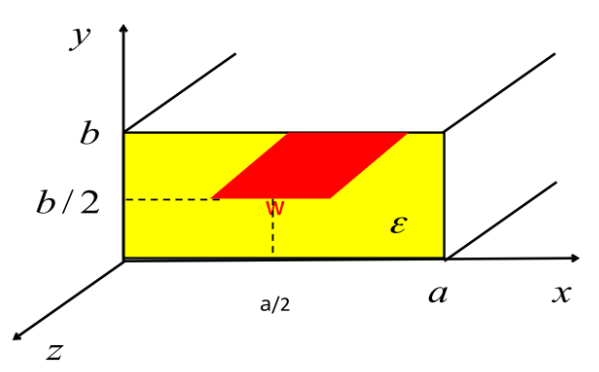

## Trabalho

Aplique o **método dos elementos finitos** para determinar o potencial bidimensional (plano xy) em um ponto qualquer na região $0 ≤ x ≤ a, 0 ≤ y ≤ b$.

### 1. Discretize o domínio em $N$ triângulos e aplique o método dos elementos finitos (2D) ao problema.

- Obtenha o sistema linear para um único elemento.
- Mostre os detalhes da discretização e da formulação, e as expressões para os elementos das matrizes do sistema linear.

---

Usando o MEF, inicialmente representamos o domínio físico por elementos finitos básicos, como triângulos, para reduzir o erro de discretização.

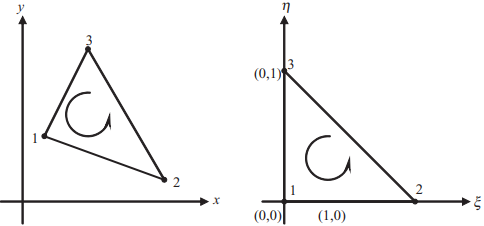

Uma função de interpolação linear para um triângulo deve ser linear em duas direções ortogonais, que podem ser os eixos x e y.

Sendo cada função de interpolação linear correspondente a um nó do triângulo, ao denotar as três funções de interpolação por $N^e_1(x,y)$, $N^e_2(x,y)$ e $N^e_3(x,y)$, estas são atribuídas aos nós 1, 2 e 3, respectivamente.

A função de forma (shape) $N^e_1(x,y)$ deve ser 1 no nó 1 e 0 nos nós 2 e 3. Assim, partindo de uma representação linear da função,

$$
N^e_1(x,y) = ax + by + c
$$

e usando as condições que:
- No nó 1: $N^e_1(x^e_1,y^e_1) = 1 = ax^e_1 + by^e_1 + c$
- No nó 2: $N^e_1(x^e_2,y^e_2) = 0 = ax^e_2 + by^e_2 + c$
- No nó 3: $N^e_1(x^e_3,y^e_3) = 0 = ax^e_3 + by^e_3 + c$

podemos representar esse sistema em forma matricial e tirar o determinante, que é igual a duas vezes a área do elemento:

$$
D = 2A_e = x^e_2 y^e_3 - x^e_3 y^e_2 - x^e_1 y^e_3 + x^e_3 y^e_1 + x^e_1 y^e_2 - x^e_2 y^e_1
$$

ainda com a forma matricial, calculamos a, b e c (omitido aqui) e podemos deduzir que a função de interpolação que corresponde ao nó 1 é dada por:

$$
N^e_1(x,y) = \frac{1}{2A_e}[(y^e_2 - y^e_3)x + (-x^e_2 + x^e_3)y + x^e_2y^e_3 - x^e_3y^e_2]
$$

De forma similar, a análise para o $N_2$ (que deve valer um para o nó 2) e para o $N_3$ (que deve valer um para o nó 3):

$$
N^e_2(x,y) = \frac{1}{2A_e}[(y^e_3 - y^e_1)x + (-x^e_3 + x^e_1)y + x^e_3y^e_1 - x^e_1y^e_3]
$$

$$
N^e_3(x,y) = \frac{1}{2A_e}[(y^e_1 - y^e_2)x + (-x^e_1 + x^e_2)y + x^e_1y^e_2 - x^e_2y^e_1]
$$

---

Seguindo a demonstração do método de Galerkin apresentada nos slides e no livro, a representação matricial para um elemento é dada abaixo:

$$
\begin{bmatrix}
K^e_{11} & K^e_{12} & \cdots & K^e_{1n} \\
K^e_{21} & K^e_{22} & \cdots & K^e_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
K^e_{n1} & K^e_{n2} & \cdots & K^e_{nn}
\end{bmatrix}
\begin{bmatrix}
V^e_{1} \\
V^e_{2} \\
\vdots \\
V^e_{n}
\end{bmatrix}
=
\begin{bmatrix}
f^e_{1} \\
f^e_{2} \\
\vdots \\
f^e_{n}
\end{bmatrix}
$$

onde:

\begin{align}
K_{e_{ij}} &= - \iint_{\Omega^e} \epsilon^e \left( \frac{\partial N^e_i}{\partial x} \frac{\partial N^e_j}{\partial x} + \frac{\partial N^e_i}{\partial y} \frac{\partial N^e_j}{\partial y} \right) \, dx \, dy \\
f_{e_i} &= - \iint_{\Omega^e} N^e_i \rho^e_v \, dx \, dy \\
\rho^e_v &= \text{valor médio da densidade de carga no elemento “e” (cte.)} \\
\epsilon^e_v &= \text{valor médio da permissividade no elemento “e”}
\end{align}

Ficando:

$$
\begin{bmatrix}
- \frac{\epsilon^e}{4 A_e}({\bar{y}^e_{23}}^2 + {\bar{x}^e_{32}}^2) & - \frac{\epsilon^e}{4 A_e}(\bar{y}^e_{23}\bar{y}^e_{31} + \bar{x}^e_{32}\bar{x}^e_{13}) & - \frac{\epsilon^e}{4 A_e}(\bar{y}^e_{23}\bar{y}^e_{12} + \bar{x}^e_{32}\bar{x}^e_{21}) \\
- \frac{\epsilon^e}{4 A_e}(\bar{y}^e_{31}\bar{y}^e_{23} + \bar{x}^e_{13}\bar{x}^e_{32}) & - \frac{\epsilon^e}{4 A_e}({\bar{y}^e_{31}}^2 + {\bar{x}^e_{13}}^2) & - \frac{\epsilon^e}{4 A_e}(\bar{y}^e_{31}\bar{y}^e_{12} + \bar{x}^e_{13}\bar{x}^e_{21}) \\
- \frac{\epsilon^e}{4 A_e}(\bar{y}^e_{12}\bar{y}^e_{23} + \bar{x}^e_{21}\bar{x}^e_{32}) & - \frac{\epsilon^e}{4 A_e}(\bar{y}^e_{12}\bar{y}^e_{31} + \bar{x}^e_{21}\bar{x}^e_{13}) & - \frac{\epsilon^e}{4 A_e}({\bar{y}^e_{12}}^2 + {\bar{x}^e_{21}}^2)
\end{bmatrix}
\begin{bmatrix}
V^e_{1} \\
V^e_{2} \\
V^e_{3}
\end{bmatrix}
=
\begin{bmatrix}
- \frac{\rho^e_v A_e}{3} \\
- \frac{\rho^e_v A_e}{3} \\
- \frac{\rho^e_v A_e}{3}
\end{bmatrix}
$$


### 2. Mostre como obter o sistema linear global, e como simplificá-lo usando as condições de contorno.
- Mostre os detalhes.

A dimensão da matriz de coeficientes de um elemento é determinada pelo número de nós desse elemento. Por exemplo, um triângulo linear possui uma matriz de coeficientes de dimensão $3 \times 3$. Já a dimensão da matriz de coeficientes global é determinada pelo número total de nós no domínio do método dos elementos finitos.

Para cada elemento finito na malha, temos uma equação da forma:

$$
\begin{bmatrix}
K^e_{11} & K^e_{12} & K^e_{13} \\
K^e_{21} & K^e_{22} & K^e_{23} \\
K^e_{31} & K^e_{32} & K^e_{33}
\end{bmatrix}
\begin{bmatrix}
V^e_{1} \\
V^e_{2} \\
V^e_{3}
\end{bmatrix}
=
\begin{bmatrix}
f^e_{1} \\
f^e_{2} \\
f^e_{3}
\end{bmatrix}
$$

como foi ilustrado na questão anterior.

Considerando que temos $N$ triângulos no nosso problema, e $W$ é o número total de nós, o sistema matricial que resulta é do tipo:

$$
[K]_{W \times W} \cdot [V]_{W \times 1} = [f]_{W \times 1}
$$

Esse sistema pode ser simplificado caso o potencial seja conhecido num dado nó $n$, usando Dirichlet Boundary Condition:

$$
V_n = V_0
$$

Neste caso, podemos eliminar a linha e a coluna correspondentes a esse nó e atualizar o termo independente:

$$
f_i = f_i - K_{in}V_0
$$

onde $i=1,2,...,W, \quad i \neq n$

Após eliminar uma determinada linha, todas as linhas abaixo devem ser deslocadas para cima em uma posição. Da mesma forma, após eliminar uma determinada coluna, todas as colunas à direita devem ser deslocadas para a esquerda em uma posição.

### 3. Implemente em uma linguagem de sua preferência.
- Mostre o código.

In [ ]:
# Bibliotecas

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, lil_matrix, linalg
from scipy.sparse.linalg import spsolve
from scipy.constants import epsilon_0
from math import *
import matplotlib.tri as tri

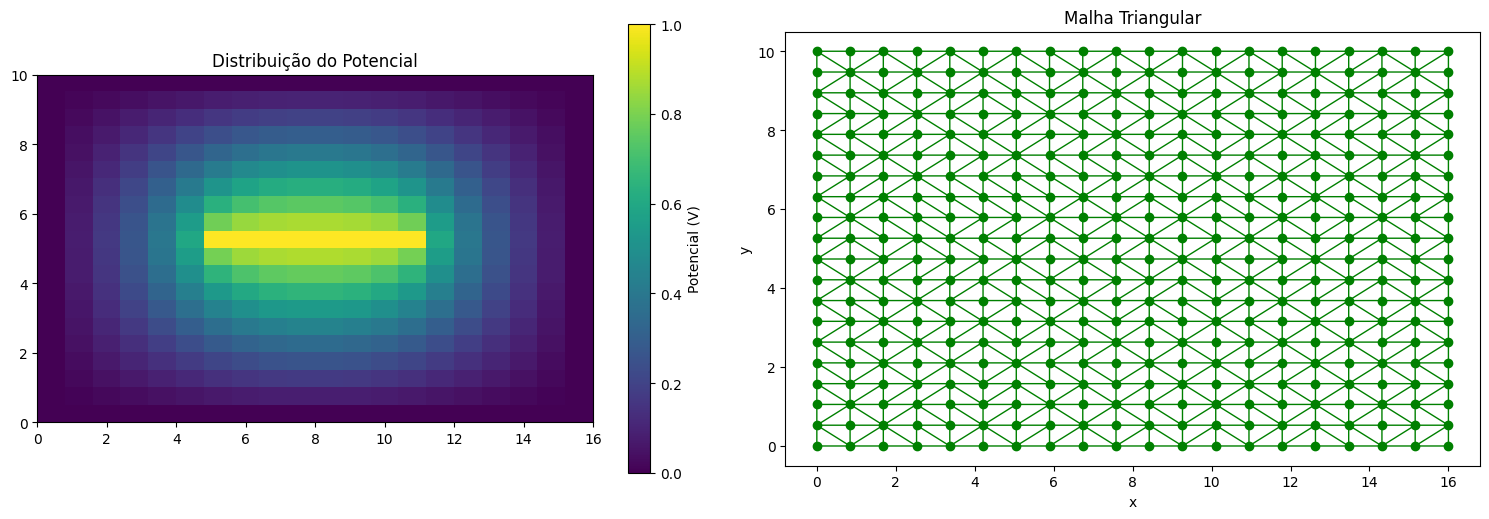

In [ ]:
# Cria a malha de pontos no espaço (x, y)
def create_mesh(a, b, nx, ny):
    x = np.linspace(0, a, nx)
    y = np.linspace(0, b, ny)
    X, Y = np.meshgrid(x, y)
    return X.flatten(), Y.flatten()

# Cria os elementos triangulares da malha
def create_elements(nx, ny):
    elements = []
    for i in range(nx - 1):
        for j in range(ny - 1):
            n1 = i + j * nx
            n2 = (i + 1) + j * nx
            n3 = i + (j + 1) * nx
            n4 = (i + 1) + (j + 1) * nx
            elements.extend([[n1, n2, n3], [n2, n4, n3]])  # Triângulo 1 e 2
    return elements

# Calcula a matriz de rigidez local para um elemento
def calculate_local_stiffness_matrix(nodes_element, epsilon_r, epsilon_0):
    x1, y1 = nodes_element[0]
    x2, y2 = nodes_element[1]
    x3, y3 = nodes_element[2]

    x21, x32, x13 = x2 - x1, x3 - x2, x1 - x3
    y21, y31, y23 = y2 - y1, y3 - y1, y2 - y3
    y12, y32 = y1 - y2, y3 - y2

    # Calcula a área do triângulo
    area = 0.5 * np.abs(x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2))
    epsilon = epsilon_r * epsilon_0

    # Matriz de rigidez local
    k_local = (epsilon / (4 * area)) * np.array([
        [y23**2 + x32**2, y23*y31 + x32*x13, y23*y12 + x32*x21],
        [y32*y23 + x13*x32, y31**2 + x13**2, y31*y12 + x13*x21],
        [y12*y23 + x21*x32, y12*y31 + x21*x13, y12**2 + x21**2]
    ])

    return k_local

# Monta a matriz global de rigidez a partir das matrizes locais
def assemble_global_stiffness_matrix(nx, ny, elements, nodes, e_r, epsilon_0):
    num_nodes = nx * ny
    K = lil_matrix((num_nodes, num_nodes))
    for element in elements:
        nodes_element = nodes[element]
        k_local = calculate_local_stiffness_matrix(nodes_element, e_r, epsilon_0)
        for i in range(3):
            for j in range(3):
                K[element[i], element[j]] += k_local[i, j]
    return K

# Aplica as condições de contorno na matriz de rigidez e no vetor de força
def apply_boundary_conditions(K, F, nodes, nx, ny, a, b, x_stripline, y_stripline, V0):
    for i in range(nx):
        for j in range(ny):
            index = i * nx + j
            x, y = nodes[index]
            # Aplica potencial na stripline
            if (b/2 <= y <= b/2 + y_stripline) and (a/2 - x_stripline <= x <= a/2 + x_stripline):
                K[index, :] = 0.0
                K[index, index] = 1
                F[index] = V0
            # Aplica potencial zero nas bordas
            elif y == 0 or y == b or x == 0 or x == a:
                K[index, :] = 0.0
                K[index, index] = 1
                F[index] = 0
    return K, F

# Resolve a distribuição de potencial usando o método dos elementos finitos
def solve_potential_distribution(a, b, x_stripline, y_stripline, nx, ny, e_r, V0, X, Y):
    nodes = np.array([X, Y]).T

    elements = create_elements(nx, ny)
    K = assemble_global_stiffness_matrix(nx, ny, elements, nodes, e_r, epsilon_0)
    F = np.zeros(nx * ny)

    K, F = apply_boundary_conditions(K, F, nodes, nx, ny, a, b, x_stripline, y_stripline, V0)

    K = K.tocsr()
    V_flat = linalg.spsolve(K, F)
    return V_flat.reshape((nx, ny))

# Plota a distribuição do potencial
def plot_potential_distribution(ax, V, a, b):
    im = ax.imshow(V, extent=[0, a, 0, b], origin='lower')
    plt.colorbar(im, ax=ax, label='Potencial (V)')
    ax.set_title('Distribuição do Potencial')

# Plota a malha triangular
def plot_triangular_mesh(ax, X, Y):
    triang = tri.Triangulation(X, Y)
    ax.triplot(triang, 'go-', lw=1.0)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Malha Triangular')
    ax.set_aspect('equal')

def main():
    a, b = 16, 10  # Dimensões do domínio
    x_stripline, y_stripline = 3, 0.5  # Dimensões da stripline
    nx, ny = 20, 20  # Granularidade da malha
    epsilon_r = 2.5  # Permissividade relativa
    V0 = 1  # Potencial da stripline

    X, Y = create_mesh(a, b, nx, ny)

    V = solve_potential_distribution(a, b, x_stripline, y_stripline, nx, ny, epsilon_r, V0, X, Y)

    # Criação da figura com dois gráficos lado a lado
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    plot_potential_distribution(axs[0], V, a, b)
    plot_triangular_mesh(axs[1], X, Y)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

### 4. Para o caso em que $W = 2 \text{ mm}$, $a = 10 \text{ mm}$, $b = 4 \text{ mm}$, e $V_0 = 1 \text{ V}$, obtenha o sistema linear para um valor de $N$ (você escolhe).
- Determine a aproximação para o potencial entre as placas.
- Plote o resultado.

*Sugestão: use um número de segmentos múltiplo de 5 na direção x, e par na direção y, isso garantirá que os extremos da fita estejam em nós da malha.*


Optamos por manter o valor de $N$, a permissividade relativa $\epsilon_r$, e a altura do stripline semelhantes à implementação anterior.

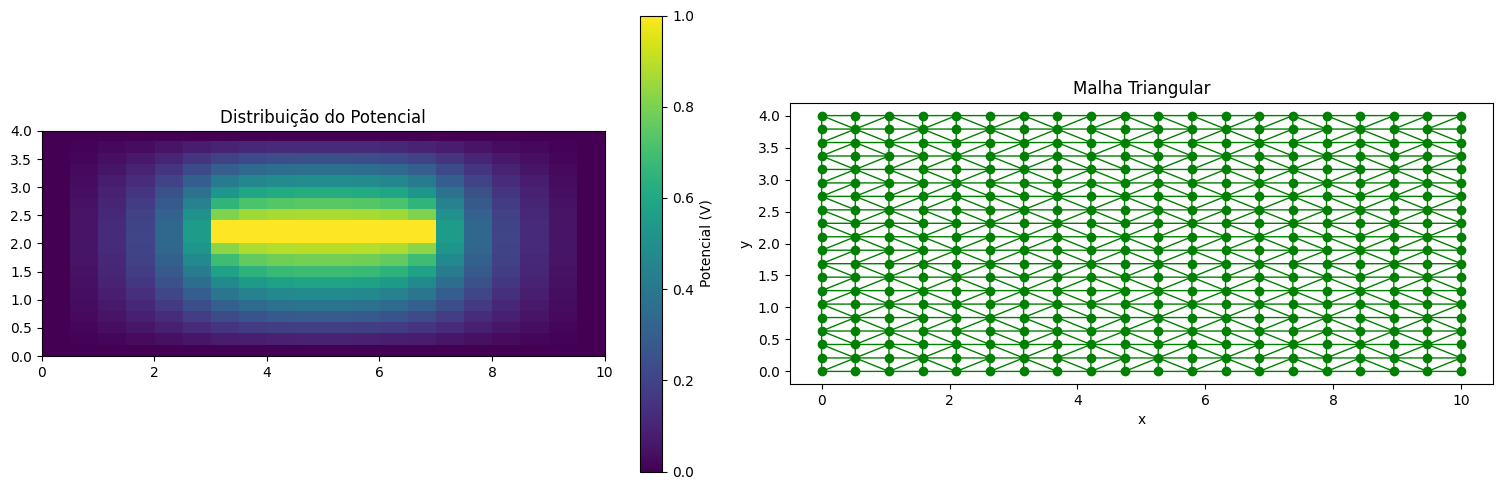

In [ ]:
a = 10
b = 4
x_stripline, y_stripline = 2, 0.5
nx, ny = 20, 20  # Granularidade da malha
epsilon_r = 2.5  # Permissividade relativa
V0 = 1  # Potencial da stripline
X, Y = create_mesh(a, b, nx, ny)

V = solve_potential_distribution(a, b, x_stripline, y_stripline, nx, ny, epsilon_r, V0, X, Y)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plot_potential_distribution(axs[0], V, a, b)
plot_triangular_mesh(axs[1], X, Y)
plt.tight_layout()
plt.show()

### 5. Repita o item anterior para diferentes valores de $N$.
- Plote as soluções para o potencial, e compare os resultados.

Alterando a malha para 10x10:

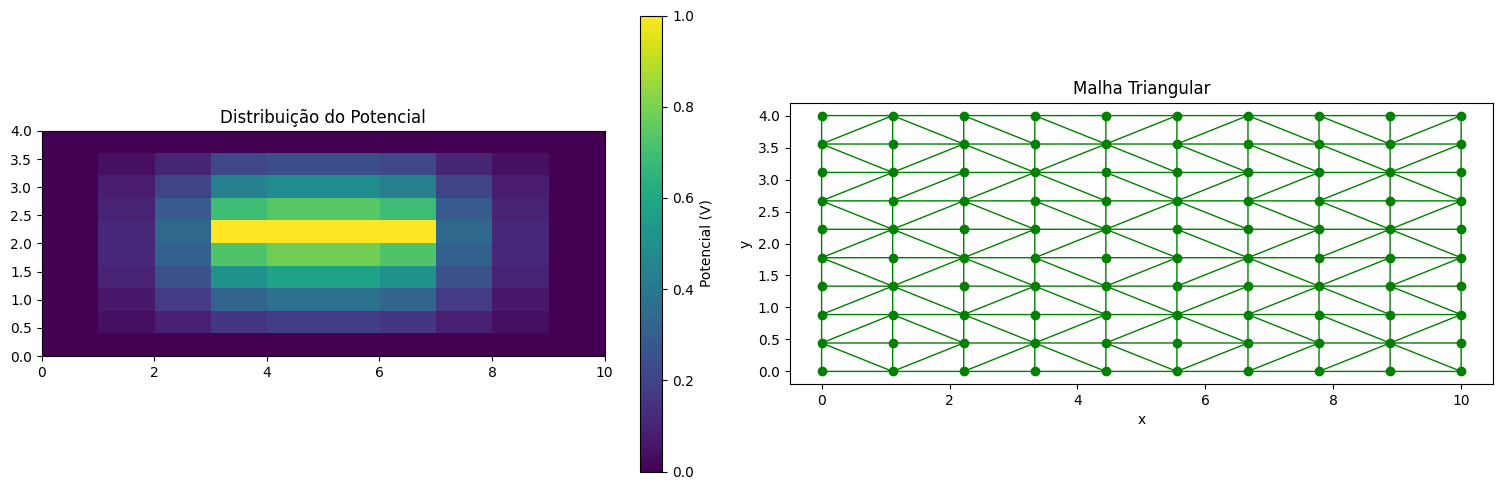

In [ ]:
nx, ny = 10, 10  # Granularidade da malha
X, Y = create_mesh(a, b, nx, ny)
nodes = np.array([X, Y]).T
V = solve_potential_distribution(a, b, x_stripline, y_stripline, nx, ny, epsilon_r, V0, X, Y)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plot_potential_distribution(axs[0], V, a, b)
plot_triangular_mesh(axs[1], X, Y)
plt.tight_layout()
plt.show()

Alterando a malha para 40x40:

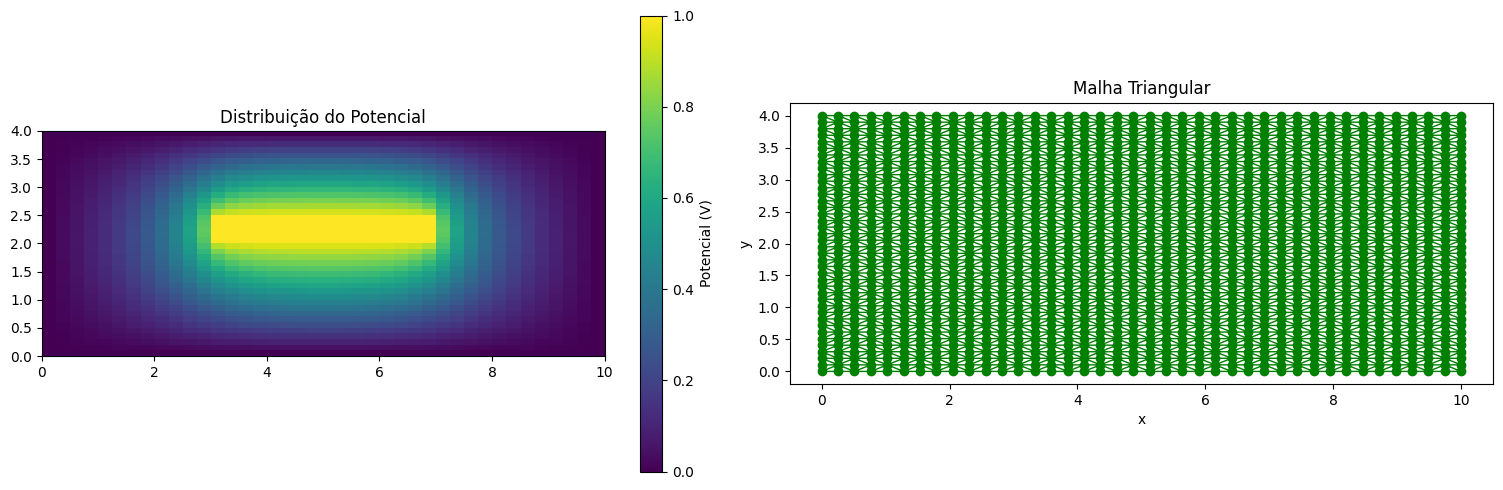

In [ ]:
nx, ny = 40, 40  # Granularidade da malha
X, Y = create_mesh(a, b, nx, ny)
nodes = np.array([X, Y]).T
V = solve_potential_distribution(a, b, x_stripline, y_stripline, nx, ny, epsilon_r, V0, X, Y)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plot_potential_distribution(axs[0], V, a, b)
plot_triangular_mesh(axs[1], X, Y)
plt.tight_layout()
plt.show()

Alterando a malha para 100x100:

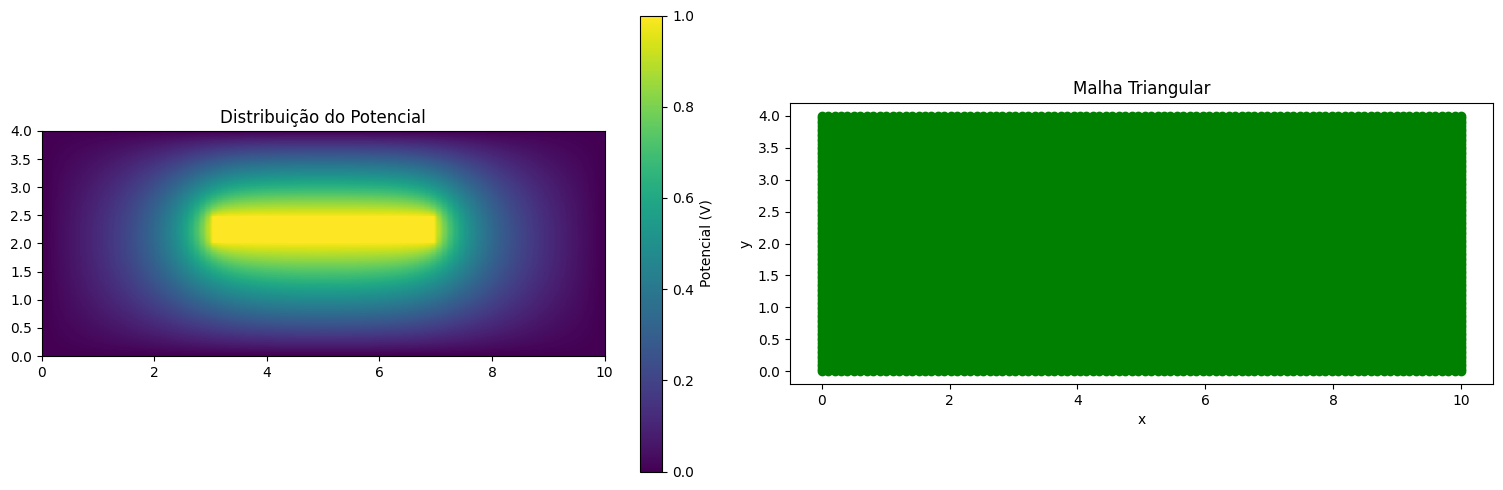

In [ ]:
nx, ny = 100, 100  # Granularidade da malha
X, Y = create_mesh(a, b, nx, ny)
nodes = np.array([X, Y]).T
V = solve_potential_distribution(a, b, x_stripline, y_stripline, nx, ny, epsilon_r, V0, X, Y)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plot_potential_distribution(axs[0], V, a, b)
plot_triangular_mesh(axs[1], X, Y)
plt.tight_layout()
plt.show()

Observamos que, ao aumentar a granularidade da malha, ou seja, ao incrementar o número de elementos no mapeamento do problema, a qualidade do gráfico do potencial melhora significativamente. Com uma malha mais fina, os valores do potencial se distribuem de maneira mais suave e contínua, resultando em uma representação visual mais precisa e natural do fenômeno.

## Referências

POLYCARPOU, Anastasis C. *Introduction to the Finite Element Method in Electromagnetics*. 1. ed. San Rafael: Morgan & Claypool Publishers, 2006.

Slides "Elementos Finitos 2D" prof. Odilon Maroja